# NYPD Arrest Data - EDA

### Objective

Analysis on the arrests happened in NYC going back from 2006 through 2023 to explore the data to find inshights and information over various factors. The Data has been sourced from <a href="https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u/about_data"><u>NYC OpenData</u></a>


#### Import Packages and Modules for Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
import plotly.express as px
from matplotlib.ticker import ScalarFormatter

### Accessing the Data

In [2]:
# Load Data
arrestData = pd.read_csv(r"C:\Users\yunej\Contacts\Desktop\Work\Portfolio\NY Arrest Data EDA\NYPD_Arrests_Data.csv")

#### View the First 5 Rows in Data

In [3]:
arrestData.head(5)

ARREST_KEY ARREST_DATE  PD_CD                   PD_DESC  KY_CD  \
0   279749403  12/31/2023  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
1   279763279  12/31/2023  117.0   RECKLESS ENDANGERMENT 1  126.0   
2   279760036  12/31/2023  101.0                 ASSAULT 3  344.0   
3   279757488  12/31/2023  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
4   279734477  12/31/2023  268.0        CRIMINAL MIS 2 & 3  121.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                  FELONY ASSAULT  PL 1200502          F           K   
1         MISCELLANEOUS PENAL LAW  PL 1202500          F           Q   
2    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           B   
3                  FELONY ASSAULT  PL 1200502          F           K   
4  CRIMINAL MISCHIEF & RELATED OF  PL 1450502          F           Q   

   ARREST_PRECINCT  ...  X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0               67  ...    999236.0   175776.0  40.649130 -73.945994   
1              115  ...   1018032.0   214171.0  40.754464 -73.878064   
2               48  ...   1015053.0   247070.0  40.844774 -73.888668   
3               68  ...    977714.0   169136.0  40.630914 -74.023544   
4              107  ...   1050164.0   203112.0  40.723928 -73.762197   

                        Lon_Lat  Zip Codes  Community Districts  \
0   POINT (-73.945994 40.64913)    16866.0                 61.0   
1  POINT (-73.878064 40.754464)    14783.0                 65.0   
2  POINT (-73.888668 40.844774)    11269.0                 35.0   
3  POINT (-74.023544 40.630914)    17216.0                 10.0   
4  POINT (-73.762197 40.723928)    24336.0                 25.0   

   Borough Boundaries City Council Districts  Police Precincts  
0                 2.0                   26.0              40.0  
1                 3.0                    5.0              73.0  
2                 5.0                   43.0              31.0  
3                 2.0                   44.0              41.0  
4                 3.0                   16.0              65.0  

[5 rows x 24 columns]

### About the Data

The `arrestData` has 24 features and 5725522 observations in total.

In [4]:
arrestData.shape

(5725522, 24)

The data set comprises <b>arrest records</b> from <b>NYPD</b>, including various details about each of the arrests such as borough, age group, sex, and race of perpetrator, and the specific offense.  A more specific description of each variable is included in `NYPD_Arrest_Data_description.xlsx`

In [5]:
# List of features of arrestData
arrestData.columns.values

array(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD',
       'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype=object)

In [6]:
# Getting the Summary of the data

arrestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725522 entries, 0 to 5725521
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ARREST_KEY              int64  
 1   ARREST_DATE             object 
 2   PD_CD                   float64
 3   PD_DESC                 object 
 4   KY_CD                   float64
 5   OFNS_DESC               object 
 6   LAW_CODE                object 
 7   LAW_CAT_CD              object 
 8   ARREST_BORO             object 
 9   ARREST_PRECINCT         int64  
 10  JURISDICTION_CODE       float64
 11  AGE_GROUP               object 
 12  PERP_SEX                object 
 13  PERP_RACE               object 
 14  X_COORD_CD              float64
 15  Y_COORD_CD              float64
 16  Latitude                float64
 17  Longitude               float64
 18  Lon_Lat                 object 
 19  Zip Codes               float64
 20  Community Districts     float64
 21  Borough Boundaries      float64

### Data Cleaning

The dataset is a raw data and has not been cleaned. So we will need to clean the data.

#### Handling Duplicates

In [7]:
# Check for duplicates
duplicateRow = arrestData.duplicated().sum()
print("Number of Duplicate Rows: " + str(duplicateRow))

# Remove Duplicates
arrestData = arrestData.drop_duplicates()

Number of Duplicate Rows: 0


#### Handling Missing Values

In [8]:
# Check for missing values
print(arrestData.isnull().sum())

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                       876
PD_DESC                    9169
KY_CD                      9756
OFNS_DESC                  9169
LAW_CODE                    196
LAW_CAT_CD                23600
ARREST_BORO                   8
ARREST_PRECINCT               0
JURISDICTION_CODE            10
AGE_GROUP                    17
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    1
Y_COORD_CD                    1
Latitude                      1
Longitude                     1
Lon_Lat                       1
Zip Codes                 25314
Community Districts        7814
Borough Boundaries         7827
City Council Districts     7815
Police Precincts           7815
dtype: int64


In [9]:
# Fill missing values for categorical columns with 'OTHER' or 'UNKNOWN'
arrestData['PD_DESC'].fillna('UNKNOWN', inplace=True)
arrestData['OFNS_DESC'].fillna('UNKNOWN', inplace=True)
arrestData['LAW_CODE'].fillna('UNKNOWN', inplace=True)
arrestData['LAW_CAT_CD'].fillna('UNKNOWN', inplace=True)
arrestData['JURISDICTION_CODE'].fillna('UNKNOWN', inplace=True)
arrestData['AGE_GROUP'].fillna('UNKNOWN', inplace=True)

# Replace missing boroughs with 'UNKNOWN'
arrestData['ARREST_BORO'].fillna('UNKNOWN', inplace=True)

# Verify that missing values have been handled
missing_values_specific = arrestData[['PD_DESC', 'OFNS_DESC', 'LAW_CODE','LAW_CAT_CD','ARREST_BORO','JURISDICTION_CODE','AGE_GROUP']].isnull().sum()
print(missing_values_specific)

PD_DESC              0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
JURISDICTION_CODE    0
AGE_GROUP            0
dtype: int64


#### Data Validation

Data Validation to check that data falls within the acceptable format

<b> `ARREST_BORO`

In [10]:
arrestData['ARREST_BORO'].unique()
# B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

array(['K', 'Q', 'B', 'M', 'S', 'UNKNOWN'], dtype=object)

In [11]:
print(arrestData['ARREST_BORO'].value_counts())
# There are only 8 unknown ARREST_BORO

K          1586366
M          1530331
B          1310266
Q          1091359
S           207192
UNKNOWN          8
Name: ARREST_BORO, dtype: int64


In [12]:
# Handle the 'UNKNOWN' values
arrestData = arrestData[arrestData['ARREST_BORO'] != 'UNKNOWN']

In [13]:
# Check
print(arrestData['ARREST_BORO'].value_counts())

K    1586366
M    1530331
B    1310266
Q    1091359
S     207192
Name: ARREST_BORO, dtype: int64


<b> `LAW_CAT_CD`

In [14]:
arrestData['LAW_CAT_CD'].unique()
# F(felony), M(misdemeanor), V(violation) 

array(['F', 'M', '9', 'V', 'I', 'UNKNOWN', '(null)'], dtype=object)

It seems '9' is not defined

In [15]:
# Handle '(null)' value
arrestData['LAW_CAT_CD'] = arrestData['LAW_CAT_CD'].replace(['9'], 'UNKNOWN')

It seems there was a `(null)` value that was not handled in column `LAW_CAT_CD`

In [16]:
# Handle '(null)' value
arrestData['LAW_CAT_CD'] = arrestData['LAW_CAT_CD'].replace(['(null)'], 'UNKNOWN')

In [17]:
# Check if null value was handled
print(arrestData['LAW_CAT_CD'].value_counts())

M          3719618
F          1658694
V           295559
I            26974
UNKNOWN      24669
Name: LAW_CAT_CD, dtype: int64


<b> `PERP_SEX`

In [18]:
arrestData['PERP_SEX'].unique()

array(['M', 'F', 'U'], dtype=object)

In [19]:
print(arrestData['PERP_SEX'].value_counts())

M    4757934
F     964076
U       3504
Name: PERP_SEX, dtype: int64


<b> `PERP_RACE`

In [20]:
arrestData['PERP_RACE'].unique()

array(['ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK', 'WHITE', 'UNKNOWN',
       'OTHER'], dtype=object)

<b> `JURISDICTION_CODE`

In [21]:
arrestData['JURISDICTION_CODE'].unique()
# 0(Patrol), 1(Transit) and 2(Housing) represent NYPD 
# While codes 3 and more represent non NYPD jurisdictions

array([0.0, 1.0, 17.0, 2.0, 11.0, 14.0, 3.0, 13.0, 87.0, 52.0, 72.0, 51.0,
       71.0, 12.0, 97.0, 73.0, 4.0, 7.0, 85.0, 79.0, 88.0, 74.0, 69.0,
       15.0, 6.0, 16.0, 9.0, 8.0, 76.0, 82.0, 'UNKNOWN'], dtype=object)

<b> `AGE_GROUP`

In [22]:
arrestData['AGE_GROUP'].unique()
# 0(Patrol), 1(Transit) and 2(Housing) represent NYPD 
# While codes 3 and more represent non NYPD jurisdictions

array(['45-64', '25-44', '18-24', '65+', '<18', '2000', '1042', '1918',
       '1928', '1947', '2007', '1937', '1916', '1942', '1953', '1998',
       '1048', '1948', '1024', '929', '1018', '1922', '937', '935', '918',
       '938', '927', '940', '928', '926', '931', '924', '942', '930',
       '941', '932', '922', '943', '934', '936', '945', '895', '948',
       '955', '317', '808', '812', '923', '949', '909', '914', '231',
       '896', '709', '640', '951', '925', '212', '200', '954', '314',
       '723', '947', '309', '959', '921', '910', '446', '944', '330',
       '912', '320', '894', 'UNKNOWN', '339', '965', '323', '946', '956',
       '194', '708', '352', '816', '920', '316', '939', '237', '952',
       '933', '740', '338'], dtype=object)

#### Data Transformation

Converting `ARREST_DATE` to `datetime` to extract the year, month and date of the arrest

In [23]:
# Convert ARREST_DATE to datetime format
arrestData['ARREST_DATE'] = pd.to_datetime(arrestData['ARREST_DATE'])
# Check
print(arrestData['ARREST_DATE'].dtypes)

# Extract year from ARREST_DATE
arrestData['ARREST_YEAR'] = arrestData['ARREST_DATE'].dt.year
arrestData['ARREST_MONTH'] = arrestData['ARREST_DATE'].dt.strftime('%b')
arrestData['ARREST_DAY'] = arrestData['ARREST_DATE'].dt.strftime('%a')

datetime64[ns]


In [24]:
# Sort the DataFrame by ARREST_DATE in descending order
arrestData_sorted = arrestData.sort_values(by='ARREST_DATE', ascending=False)
arrestData_sorted.head(5)

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0     279749403  2023-12-31  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
224   279763515  2023-12-31  105.0               STRANGULATION 1ST  106.0   
244   279761318  2023-12-31  493.0  STOLEN PROPERTY-MOTOR VEH 2ND,  111.0   
243   279745569  2023-12-31  101.0                       ASSAULT 3  344.0   
242   279758832  2023-12-31  782.0        WEAPONS, POSSESSION, ETC  236.0   

                         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   FELONY ASSAULT  PL 1200502          F           K   
224                 FELONY ASSAULT  PL 1211200          F           M   
244  POSSESSION OF STOLEN PROPERTY  PL 1654505          F           B   
243   ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           K   
242              DANGEROUS WEAPONS  PL 2650102          M           B   

     ARREST_PRECINCT  ...  Longitude                       Lon_Lat Zip Codes  \
0                 67  ... -73.945994   POINT (-73.945994 40.64913)   16866.0   
224               26  ... -73.952026  POINT (-73.952026 40.812592)   12424.0   
244               42  ... -73.905274  POINT (-73.905274 40.834196)   10934.0   
243               83  ... -73.926939  POINT (-73.926939 40.697909)   18181.0   
242               49  ... -73.839868   POINT (-73.839868 40.84424)   11270.0   

    Community Districts  Borough Boundaries  City Council Districts  \
0                  61.0                 2.0                    26.0   
224                37.0                 4.0                    36.0   
244                34.0                 5.0                    42.0   
243                42.0                 2.0                    30.0   
242                59.0                 5.0                    12.0   

     Police Precincts  ARREST_YEAR ARREST_MONTH  ARREST_DAY  
0                40.0         2023          Dec         Sun  
224              17.0         2023          Dec         Sun  
244              25.0         2023          Dec         Sun  
243              53.0         2023          Dec         Sun  
242              32.0         2023          Dec         Sun  

[5 rows x 27 columns]

In [25]:
arrestData['ARREST_YEAR'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006], dtype=int64)

Standardizing Borough Name, Offense Category, and Jurisdiction Code for Better Understanding

In [26]:
# Standardizing borough names
borough_mapping = {'M': 'Manhattan', 'B': 'Bronx', 'K': 'Brooklyn', 'Q': 'Queens', 'S': 'Staten Island'}
arrestData['ARREST_BORO'] = arrestData['ARREST_BORO'].replace(borough_mapping)

In [27]:
# Standardizing offense category
offense_category_mapping = {'M': 'Misdemeanor','F': 'Felony','V': 'Violation','I': 'Infraction','UNKNOWN': 'Unspecified','9': '9'}
arrestData['LAW_CAT_CD'] = arrestData['LAW_CAT_CD'].replace(offense_category_mapping)

In [28]:
# Standardizing Jurisdiction Code
# Define a function to map jurisdiction codes
def map_jurisdiction(code):
    if code == 0:
        return 'Patrol'
    elif code == 1:
        return 'Transit'
    elif code == 2:
        return 'Housing'
    else:
        return 'Non NYPD Jurisdiction'

# Apply the mapping function to the 'JURISDICTION_CODE' column
arrestData['JURISDICTION_CODE'] = arrestData['JURISDICTION_CODE'].apply(lambda x: map_jurisdiction(x))

### Exploratory Data Analysis

#### 1. Yearly Trend

Plotting the frequency of crime over the years using line plot

In [29]:
# Creating table for the number of arrest in each year
arrestDataByYear = arrestData.groupby(['ARREST_YEAR']).count()
arrestDataByYear = arrestDataByYear['ARREST_KEY']

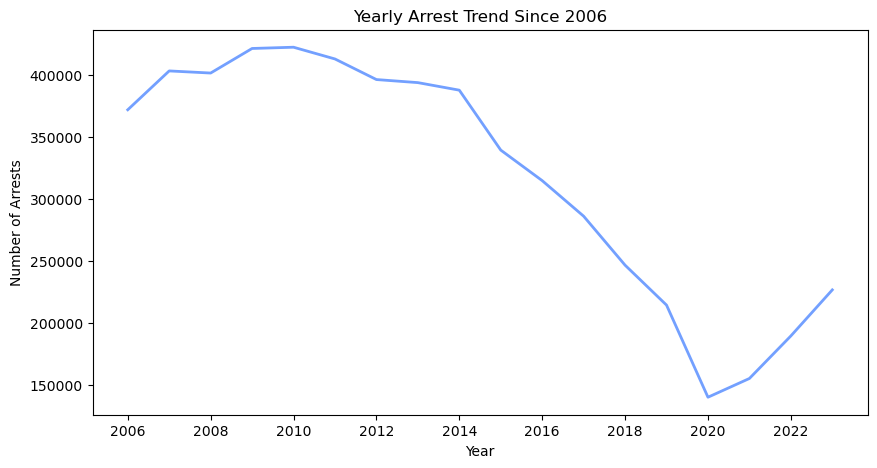

In [30]:
# Plot Visualization

plt.figure(facecolor = '#FFFFFF')

vizByYear = arrestDataByYear.plot.line('ARREST_YEAR', 'ARREST_KEY',  
                          figsize = (10,5), color = "#73A0FF", linewidth = 2, 
                            fontsize = 12)

# Change Visualization Settings
vizByYear.set_facecolor('#FFFFFF')
vizByYear.set_title('Yearly Arrest Trend Since 2006', color = "#000000", fontsize = 12)
vizByYear.xaxis.label.set_color("#000000")
vizByYear.yaxis.label.set_color("#000000")
vizByYear.set_xlabel(xlabel = 'Year', fontsize = 10)
vizByYear.set_ylabel(ylabel = 'Number of Arrests', fontsize = 10)
vizByYear.tick_params(colors = "#000000", labelsize = 10)
vizByYear.set_xticks(arrestDataByYear.index);

# Set x-axis ticks to integers and limit to 11 ticks
vizByYear.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=11))

plt.show()

#### 2. Arrests by Level of Offense and Offense Category

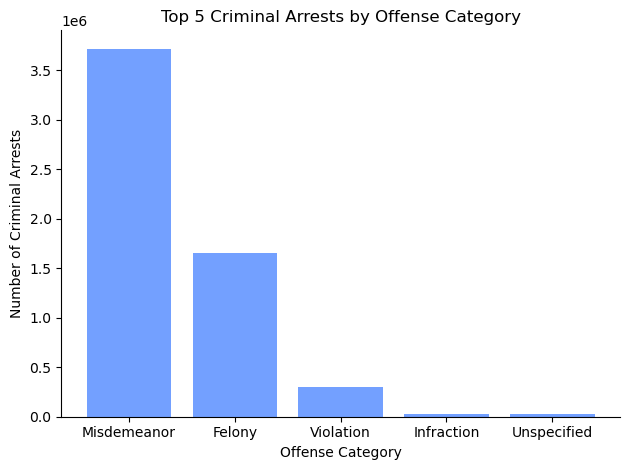

In [31]:
# Sort the data by 'ARREST_KEY' in descending order
arrestData.sort_values(by='ARREST_KEY', ascending=False, inplace=True)

# Select the top 5 'LAW_CAT_CD' values for plotting
top_law_cat = arrestData['LAW_CAT_CD'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 'LAW_CAT_CD'
filtered_data = arrestData[arrestData['LAW_CAT_CD'].isin(top_law_cat)]

# Count occurrences of each top 'LAW_CAT_CD'
top_law_cat_counts = filtered_data['LAW_CAT_CD'].value_counts()

# Plotting the vertical bar chart and assign it to variable vizByJuris
vizByJuris = plt.bar(top_law_cat_counts.index, top_law_cat_counts.values, color='#73A0FF')

# Customize plot appearance
plt.xlabel('Offense Category', color='#000000', fontsize=10)
plt.ylabel('Number of Criminal Arrests', color='#000000', fontsize=10)
plt.title('Top 5 Criminal Arrests by Offense Category', color='#000000', fontsize=12)
plt.tick_params(axis='x', colors='#000000', labelsize=10) 
plt.tick_params(axis='y', colors='#000000', labelsize=10)
plt.gca().spines['left'].set_color('#000000')
plt.gca().spines['bottom'].set_color('#000000')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

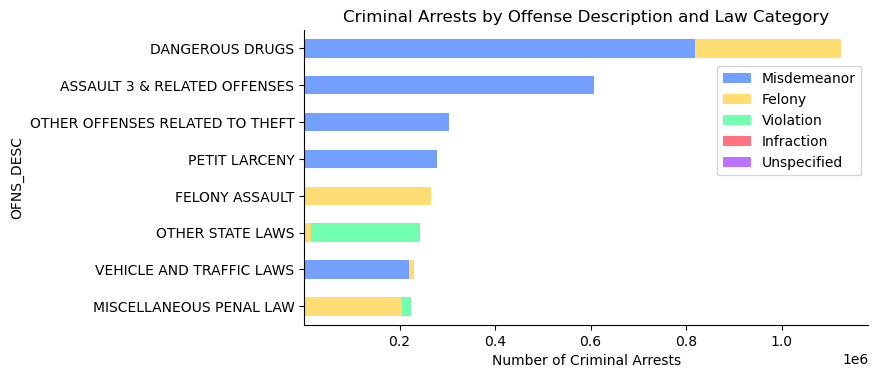

In [32]:
# Sort the data by 'OFNS_DESC' in descending order
arrestData.sort_values(by='OFNS_DESC', ascending=False, inplace=True)

# Select the top 'OFNS_DESC' values for plotting 
top_ofns_desc = arrestData['OFNS_DESC'].value_counts().nlargest(8).index

# Filter the DataFrame to include only the top 'OFNS_DESC'
filtered_data = arrestData[arrestData['OFNS_DESC'].isin(top_ofns_desc)]

# Define the order of 'LAW_CAT_CD'
law_cat_order = ['Misdemeanor', 'Felony', 'Violation', 'Infraction', 'Unspecified']

# Group by 'OFNS_DESC' and 'LAW_CAT_CD' and count occurrences
grouped_data = filtered_data.groupby(['OFNS_DESC', 'LAW_CAT_CD']).size().unstack(fill_value=0)

# Reindex the columns to ensure they appear in the specified order
grouped_data = grouped_data.reindex(columns=law_cat_order)

# Sort grouped_data by the total sum of each row in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Plotting the stacked bar chart
plt.figure(figsize=(9, 4))
grouped_data.plot(kind='barh', stacked=True, color=['#73A0FF', '#FFDD73', '#73FFB1', '#FF7381', '#BB73FF'], ax=plt.gca())

# Customize 
plt.gca().invert_yaxis()  
plt.xlabel('Number of Criminal Arrests', color='#000000', fontsize=10)
plt.title('Criminal Arrests by Offense Description and Law Category', color='#000000', fontsize=12)
plt.tick_params(axis='x', colors='#000000', labelsize=10)
plt.tick_params(axis='y', colors='#000000', labelsize=10)
plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1, 0.9))  
plt.gca().spines['left'].set_color('#000000')
plt.gca().spines['bottom'].set_color('#000000')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout to fit legend
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

#### 3. Top 8 Criminal Arrests over the Year

Creating Visualization to show number of arrest by top 10 Different Criminal Arrests over the Year

In [33]:
#Creating Table for the number of arrest by top 10 different criminal arrests over the year

arrestDataTypeYear = arrestData.groupby(['OFNS_DESC','ARREST_YEAR'], as_index = False).count()
arrestDataTypeYear = arrestDataTypeYear[['OFNS_DESC', 'ARREST_YEAR', 'ARREST_KEY']]
top10 = top_ofns_desc = arrestData['OFNS_DESC'].value_counts().nlargest(8).index
arrestDataTypeYear = arrestDataTypeYear[arrestDataTypeYear['OFNS_DESC'].isin(top10)]


arrestDataTypeYearSample = arrestDataTypeYear[arrestDataTypeYear["OFNS_DESC"] == "OTHER OFFENSES RELATED TO THEFT"]
arrestDataTypeYearSample

OFNS_DESC  ARREST_YEAR  ARREST_KEY
864  OTHER OFFENSES RELATED TO THEFT         2006       14842
865  OTHER OFFENSES RELATED TO THEFT         2007       16985
866  OTHER OFFENSES RELATED TO THEFT         2008       18344
867  OTHER OFFENSES RELATED TO THEFT         2009       22583
868  OTHER OFFENSES RELATED TO THEFT         2010       26019
869  OTHER OFFENSES RELATED TO THEFT         2011       25856
870  OTHER OFFENSES RELATED TO THEFT         2012       31426
871  OTHER OFFENSES RELATED TO THEFT         2013       32946
872  OTHER OFFENSES RELATED TO THEFT         2014       30655
873  OTHER OFFENSES RELATED TO THEFT         2015       29931
874  OTHER OFFENSES RELATED TO THEFT         2016       27333
875  OTHER OFFENSES RELATED TO THEFT         2017       19911
876  OTHER OFFENSES RELATED TO THEFT         2018        7359

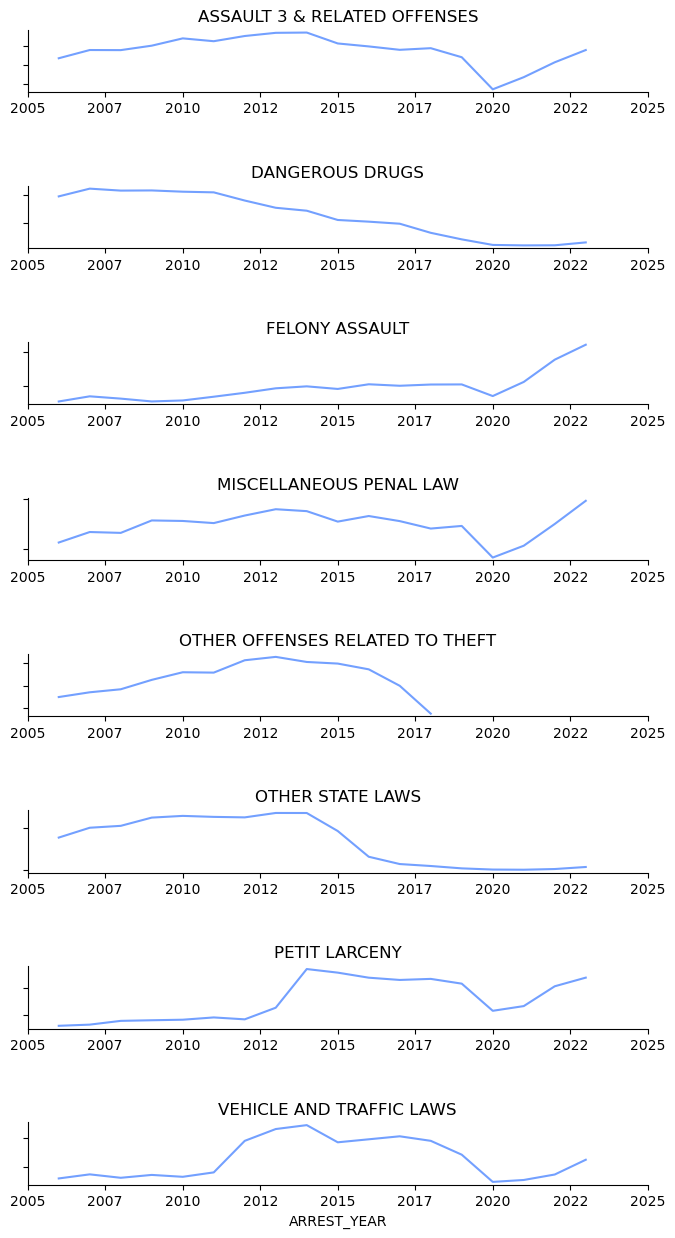

In [34]:
# Create Visualization
arrestDataTypeYearPlot = pd.pivot_table(arrestDataTypeYear, index='ARREST_YEAR', columns='OFNS_DESC', values='ARREST_KEY')

# Create subplots for each different criminal arrest
vizArrestDataTypeYear = arrestDataTypeYearPlot.plot(subplots=True, figsize=(8, 15), color = "#73A0FF")

# Change facecolor of Visualization and adjust space between the subplots
fig = plt.gcf()
fig.set_facecolor("#FFFFFF")  # White background
fig.subplots_adjust(hspace=1.5)

# Change Styles of Visualization
for i, ax in enumerate(fig.get_axes()):
    
    # Set facecolor, ticks, and axis
    ax.set_facecolor("#FFFFFF")  # White background
    ax.tick_params(axis="x", colors="black", bottom=True, top=False, labelbottom=True)
    ax.tick_params(axis="y", labelleft=False)
    ax.spines['bottom'].set_color('black')  # Black axis lines
    ax.spines['left'].set_color('black')    # Black axis lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove Legend
    ax.get_legend().remove()
    
    # Set Title for each Subplot
    ax.set_title(arrestDataTypeYearPlot.columns[i], color="black", fontsize=12)  # Black title and font size 12
    
    # Set x-axis labels without decimals
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)  # Set the tick positions explicitly
    ax.set_xticklabels([int(xtick) for xtick in xticks])  # Set the tick labels as integers

plt.show()

#### 4. Arrest By Sex and Borough

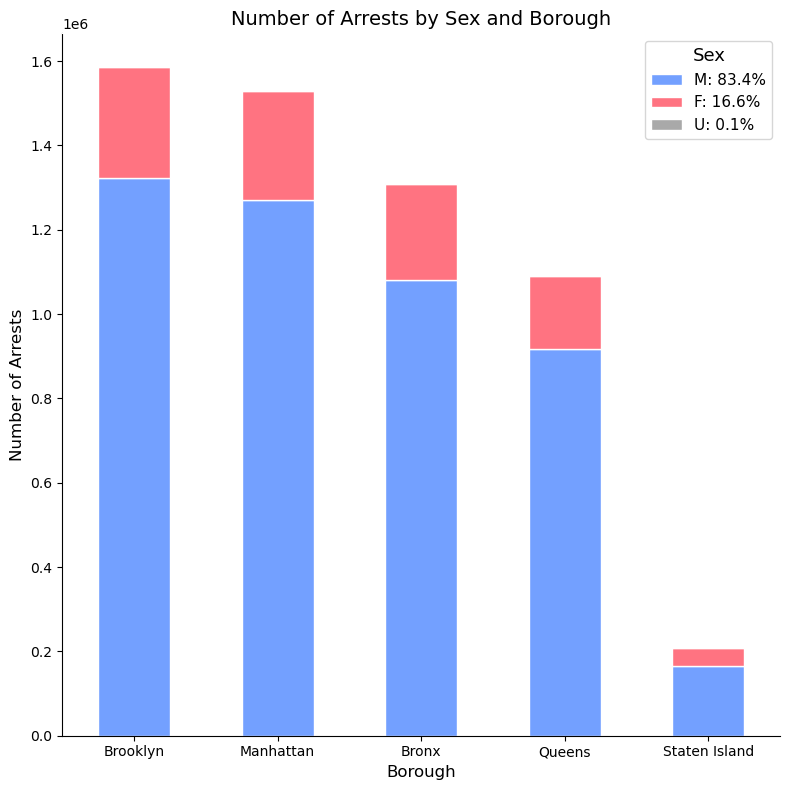

In [35]:
# Grouping data by PERP_SEX and ARREST_BORO and counting the number of arrests
grouped_data_SB = arrestData.groupby(['PERP_SEX', 'ARREST_BORO']).size().reset_index(name='number_of_arrests')

# Pivot the data to get it in the right format for a stacked bar plot
pivot_data_SB = grouped_data_SB.pivot(index='ARREST_BORO', columns='PERP_SEX', values='number_of_arrests').fillna(0)

# Reorder columns so that 'M' (Male) is at the bottom
pivot_data_SB = pivot_data_SB[['M', 'F', 'U']]

# Calculate total arrests per borough
pivot_data_SB['total'] = pivot_data_SB.sum(axis=1)

# Calculate percentages
for col in ['M', 'F', 'U']:
    pivot_data_SB[f'{col}_percent'] = pivot_data_SB[col] / pivot_data_SB['total'] * 100

# Sort boroughs based on total arrests in descending order
sorted_boroughs = pivot_data_SB['total'].sort_values(ascending=False).index

# Reorder rows based on sorted boroughs
pivot_data_SB = pivot_data_SB.loc[sorted_boroughs]

# Define custom colors for 'F' (Female) and 'M' (Male)
colors_SB = {'F': '#FF7381', 'M': '#73A0FF'}

# Plotting
vizBySB = pivot_data_SB[['M', 'F', 'U']].plot(kind='bar', stacked=True, figsize=(8, 8), color=[colors_SB.get(x, '#A9A9A9') for x in ['M', 'F', 'U']], edgecolor='white')

# Customizing the plot
vizBySB.set_title("Number of Arrests by Sex and Borough", fontsize=14)
vizBySB.set_xlabel("Borough", fontsize=12)
vizBySB.set_ylabel("Number of Arrests", fontsize=12)

# Create legend labels with percentages rounded to 0.1 decimal points
legend_labels = [f'{col}: {pivot_data_SB[f"{col}_percent"].iloc[0]:.1f}%' for col in ['M', 'F', 'U']]
vizBySB.legend(legend_labels, title='Sex', title_fontsize='13', fontsize='11')

plt.xticks(range(len(pivot_data_SB.index)), pivot_data_SB.index, rotation=0)

# Use autolayout to prevent overlapping annotations
plt.tight_layout()

# Make the upper and right outline box white
vizBySB.spines['top'].set_color('white')
vizBySB.spines['right'].set_color('white')

plt.show()

In [36]:
# Grouping data by PERP_SEX and ARREST_BORO and counting the number of arrests
grouped_data_SB = arrestData.groupby(['PERP_SEX', 'ARREST_BORO']).size().reset_index(name='number_of_arrests')

# Pivot the data to get it in the right format for analysis
pivot_data_SB = grouped_data_SB.pivot(index='ARREST_BORO', columns='PERP_SEX', values='number_of_arrests').fillna(0)

# Calculate total arrests per borough
pivot_data_SB['total'] = pivot_data_SB.sum(axis=1)

# Calculate the proportion of female perpetrators for each borough
pivot_data_SB['female_proportion'] = pivot_data_SB['F'] / pivot_data_SB['total']

# Print the proportions
print(pivot_data_SB['female_proportion'])

ARREST_BORO
Bronx            0.174245
Brooklyn         0.165599
Manhattan        0.168924
Queens           0.158343
Staten Island    0.201509
Name: female_proportion, dtype: float64


In [37]:
# Count total arrests by borough
total_arrests_by_boro = arrestData['ARREST_BORO'].value_counts()

# Count the total number of arrests in the entire dataset
total_arrests = arrestData.shape[0]

# Calculate the proportion of arrests by borough
proportion_by_boro = total_arrests_by_boro / total_arrests

# Print the proportions
print(proportion_by_boro)

Brooklyn         0.277070
Manhattan        0.267283
Bronx            0.228847
Queens           0.190613
Staten Island    0.036187
Name: ARREST_BORO, dtype: float64


#### 5. Arrest Locations in NYC (Historical vs 2023)

In [38]:
# Sample 5000 rows
filtered_df_ArrestLoc_All = arrestData.sample(n=5000, random_state=2024)

# Set Color
colors_map = {'Queens': '#5075FF' ,'Brooklyn': '#FFBE54','Staten Island': '#3CB04B','Manhattan': '#FF5D50', 'Bronx': '#AA6CFF'}

# Plotting with Plotly Express scatter_mapbox
vizByArrestLocAll = px.scatter_mapbox(filtered_df_ArrestLoc_All, 
                        lat='Latitude',   
                        lon='Longitude',   
                        color='ARREST_BORO',
                        color_discrete_map=colors_map,
                        mapbox_style='open-street-map',  
                        zoom=10,                         
                        height=800,             
                        )

vizByArrestLocAll.show()

In [39]:
# Filter data for ARREST_YEAR 2023 and sample 5000 rows
filtered_df_ArrestLoc = arrestData[arrestData['ARREST_YEAR'] == 2023].sample(n=5000, random_state=2024)

# Plotting with Plotly Express scatter_mapbox
vizByArrestLoc = px.scatter_mapbox(filtered_df_ArrestLoc, 
                        lat='Latitude',   
                        lon='Longitude',   
                        color='ARREST_BORO',
                        color_discrete_map=colors_map,
                        mapbox_style='open-street-map',  
                        zoom=10,                         
                        height=800                       
                        )

vizByArrestLoc.show()

#### 6. Arrest Location by Jurisdiction(Historic vs 2023)

In [40]:
# Filter data for ARREST_YEAR 2023 and sample 5000 rows
filtered_df_ArrestLoc_All = arrestData.sample(n=10000, random_state=2024)

# Set Color
colors_map = {'Patrol': 'rgba(84, 175, 255, 0.7)' ,'Housing': '#FFBE54','Transit': '#54FF90','Non NYPD Jurisdiction': '#FF5754'}

# Plotting with Plotly Express scatter_mapbox
vizByArrestLocJurisAll = px.scatter_mapbox(filtered_df_ArrestLoc_All, 
                        lat='Latitude',   
                        lon='Longitude',
                        color='JURISDICTION_CODE',
                        color_discrete_map=colors_map,
                        mapbox_style='open-street-map',  
                        zoom=10,                         
                        height=800                       
                        )

vizByArrestLocJurisAll.show()


In [41]:
# Filter data for ARREST_YEAR 2023 and sample 5000 rows
filtered_df_ArrestLoc = arrestData[arrestData['ARREST_YEAR'] == 2023].sample(n=10000, random_state=2024)

# Set Color
colors_map = {'Patrol': 'rgba(84, 175, 255, 0.7)' ,'Housing': '#FFBE54','Transit': '#54FF90','Non NYPD Jurisdiction': '#FF5754'}

# Plotting with Plotly Express scatter_mapbox
vizByArrestLocJuris = px.scatter_mapbox(filtered_df_ArrestLoc, 
                        lat='Latitude',   
                        lon='Longitude',
                        color='JURISDICTION_CODE',
                        color_discrete_map=colors_map,
                        mapbox_style='open-street-map',  
                        zoom=10,                         
                        height=800                       
                        )

vizByArrestLocJuris.show()
